In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dataset source - https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

In [2]:
# Loading in the dataset and viewing the first few rows
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Inspecting the number of rows and columns
df.shape

(1000000, 8)

In [4]:
# Checking for any duplicate rows of data
df.duplicated().sum()

0

# Distance From Home

In [5]:
# Checking the spread of distance from home
df.distance_from_home.describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

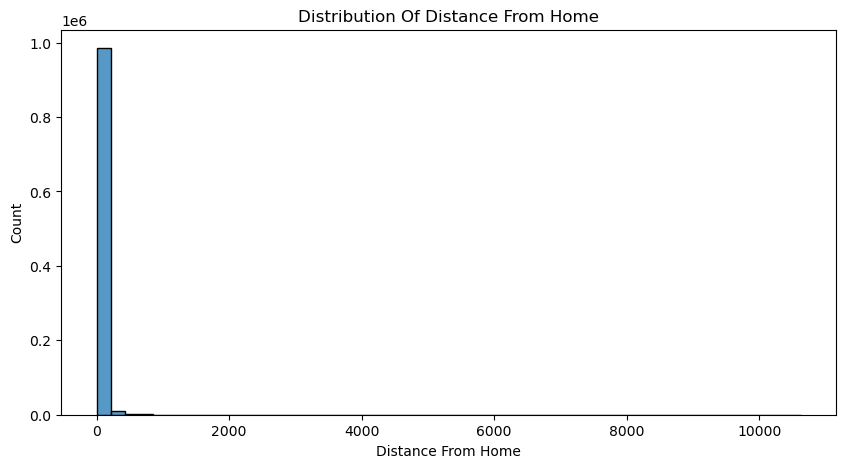

In [6]:
# Visualising the spread of distance from home
plt.figure(figsize=(10,5))
sns.histplot(df.distance_from_home, bins=50)
plt.title('Distribution Of Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.show()

# Distance From Last Transaction

In [7]:
# Checking the spread of distance from last transaction
df.distance_from_last_transaction.describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

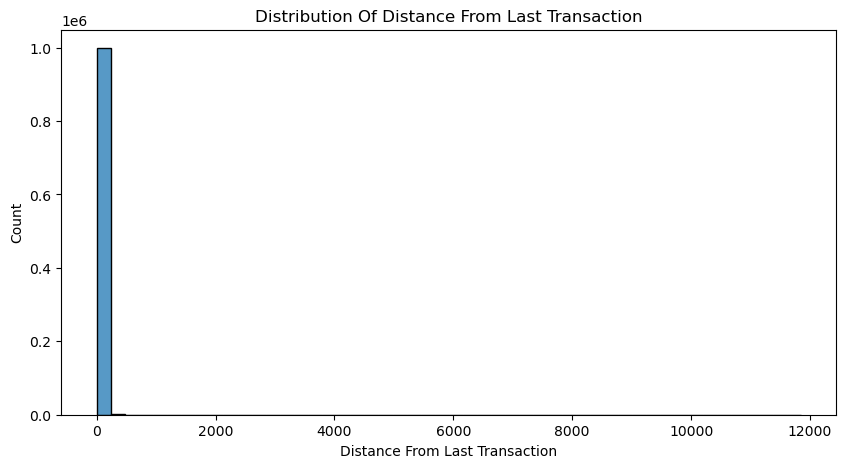

In [8]:
# Visualising the spread of distance from last transaction
plt.figure(figsize=(10,5))
sns.histplot(df.distance_from_last_transaction, bins=50)
plt.title('Distribution Of Distance From Last Transaction')
plt.xlabel('Distance From Last Transaction')
plt.ylabel('Count')
plt.show()

# Ratio To Median Purchase Price

In [9]:
# Checking the spread of ratio_to_median_purchase_price
df.ratio_to_median_purchase_price.describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

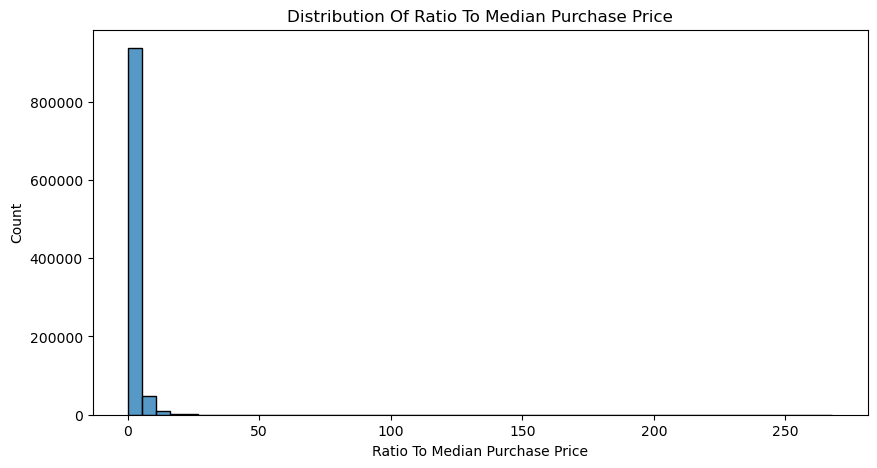

In [10]:
# Visualising the spread of ratio to median purchase price
plt.figure(figsize=(10,5))
sns.histplot(df.ratio_to_median_purchase_price, bins=50)
plt.title('Distribution Of Ratio To Median Purchase Price')
plt.xlabel('Ratio To Median Purchase Price')
plt.ylabel('Count')
plt.show()

# Repeat Retailer

In [11]:
# Checking the counts for repeat retailer
df.repeat_retailer.value_counts()

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64

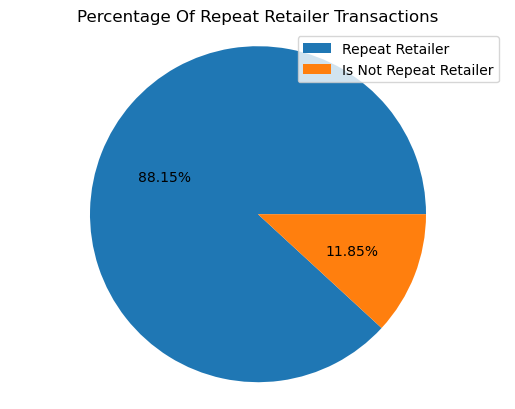

In [12]:
# Visualising the counts of repeat retailer
repeat_retailer_counts = df.repeat_retailer.value_counts()
plt.pie(repeat_retailer_counts, autopct='%.2f%%')
plt.title('Percentage Of Repeat Retailer Transactions')
plt.axis('equal')
plt.legend(['Repeat Retailer', 'Is Not Repeat Retailer'], loc=1)
plt.show()

# Used Chip

In [13]:
# Checking the counts for used_chip
df.used_chip.value_counts()

used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64

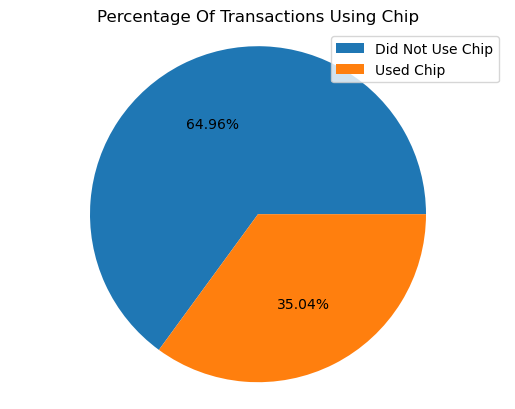

In [14]:
# Visualising the counts of used chip
used_chip_counts = df.used_chip.value_counts()
plt.pie(used_chip_counts, autopct='%.2f%%')
plt.title('Percentage Of Transactions Using Chip')
plt.axis('equal')
plt.legend(['Did Not Use Chip', 'Used Chip'])
plt.show()

# Used Pin Number

In [15]:
# Checking the counts for used_pin_number
df.used_pin_number.value_counts()

used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64

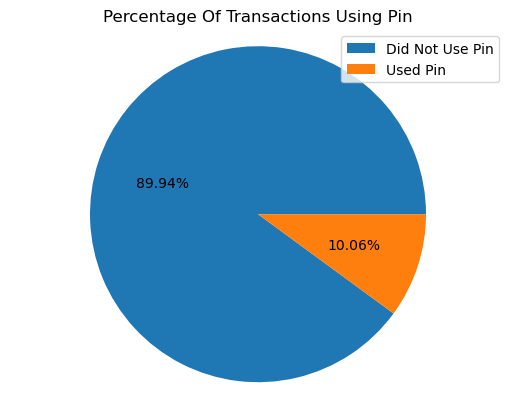

In [16]:
# Visualising the counts for used pin number
used_pin_counts = df.used_pin_number.value_counts()
plt.pie(used_pin_counts, autopct='%.2f%%')
plt.title('Percentage Of Transactions Using Pin')
plt.axis('equal')
plt.legend(['Did Not Use Pin', 'Used Pin'])
plt.show()

# Online Order

In [17]:
# Checking the counts for online order
df.online_order.value_counts()

online_order
1.0    650552
0.0    349448
Name: count, dtype: int64

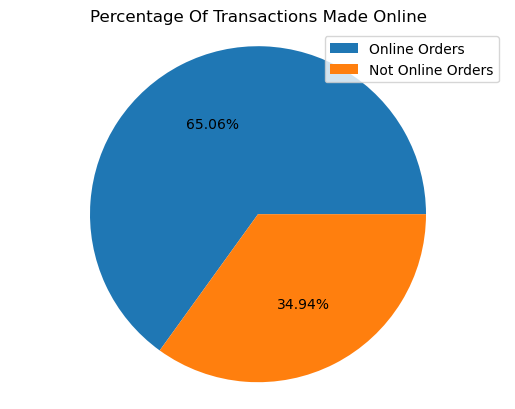

In [18]:
# Visualising the counts for online order
online_order_counts = df.online_order.value_counts()
plt.pie(online_order_counts, autopct='%.2f%%')
plt.title('Percentage Of Transactions Made Online')
plt.axis('equal')
plt.legend(['Online Orders', 'Not Online Orders'])
plt.show()

# Fraud

In [19]:
# Checking the counts for fraudulent transactions
df.fraud.value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

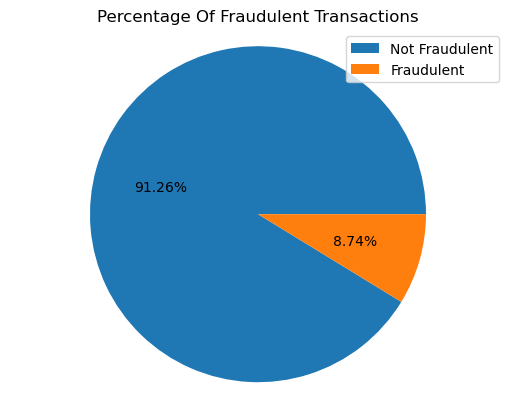

In [20]:
# Visualising the percentages of fraudulent transactions
fraud_counts = df.fraud.value_counts()
plt.pie(fraud_counts, autopct='%.2f%%')
plt.title('Percentage Of Fraudulent Transactions')
plt.axis('equal')
plt.legend(['Not Fraudulent', 'Fraudulent'])
plt.show()

# Visualisations

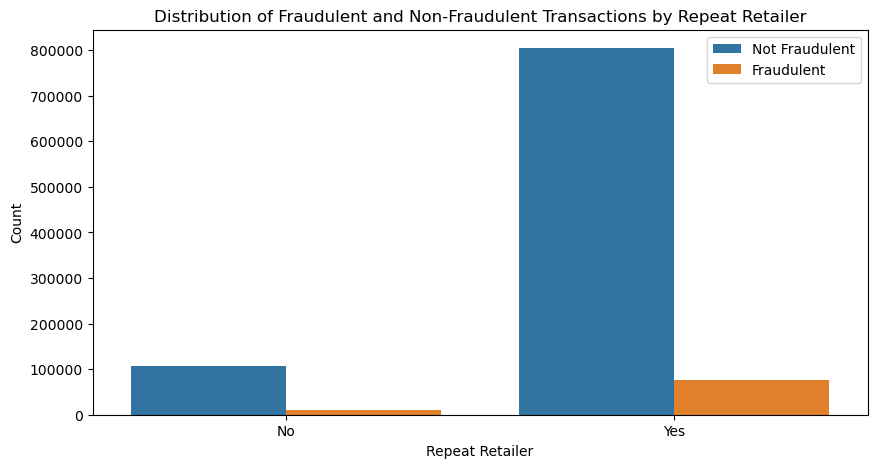

In [21]:
# Visualising how repeat retailer impacts the number of fraudulent transactions
plt.figure(figsize=(10,5))
sns.countplot(x='repeat_retailer', hue='fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions by Repeat Retailer')
plt.xlabel('Repeat Retailer')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['Not Fraudulent', 'Fraudulent'])
plt.show()

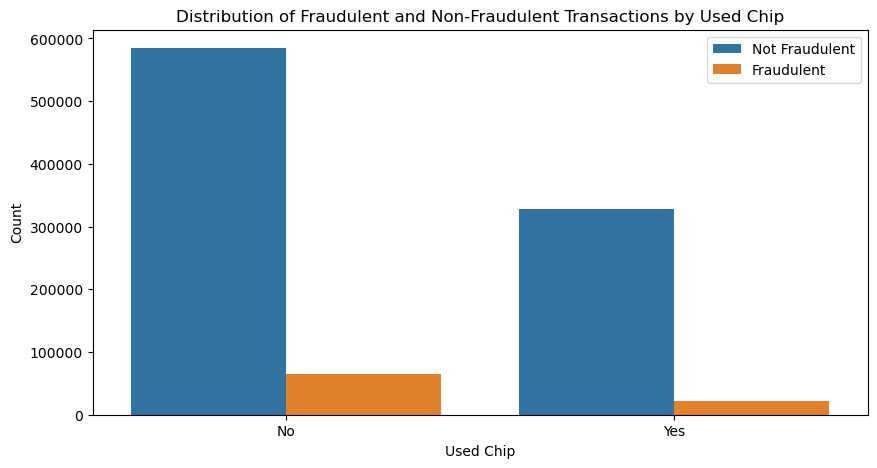

In [22]:
# Visualising how using chip impacts the number of fraudulent transactions
plt.figure(figsize=(10,5))
sns.countplot(x='used_chip', hue='fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions by Used Chip')
plt.xlabel('Used Chip')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['Not Fraudulent', 'Fraudulent'])
plt.show()

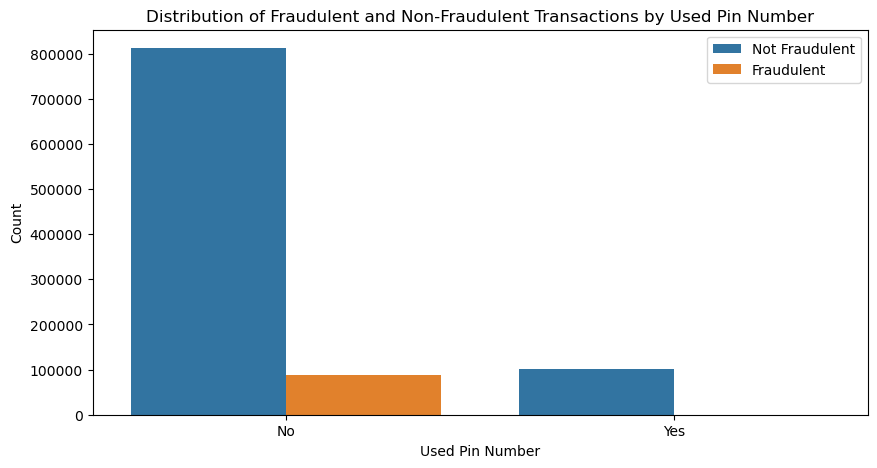

In [23]:
# Visualising how using the pin number effects the number of fraudulent transactions
plt.figure(figsize=(10,5))
sns.countplot(x='used_pin_number', hue='fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions by Used Pin Number')
plt.xlabel('Used Pin Number')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['Not Fraudulent', 'Fraudulent'])
plt.show()

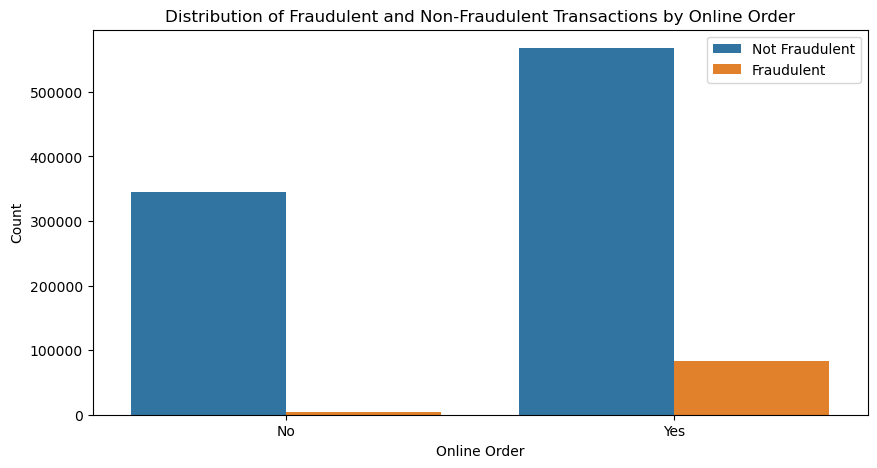

In [24]:
# Visualising how doing an online order impacts the number of fraudulent transactions 
plt.figure(figsize=(10,5))
sns.countplot(x='online_order', hue='fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions by Online Order')
plt.xlabel('Online Order')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['Not Fraudulent', 'Fraudulent'])
plt.show()

# Reducing Dataset

In [25]:
# The dataset is far too large for my laptop to process quickly for a ML model, so I will take a fraction of the data,
# but keep the same ratio of fraud to not fraud rows.

_, reduced_df = train_test_split(df, test_size=0.01, stratify=df['fraud'], random_state=5)

In [26]:
# Checking the counts for fraud to make sure the ratio is the same
reduced_df.fraud.value_counts()

fraud
0.0    9126
1.0     874
Name: count, dtype: int64

# Checking For Any Influential Outliers

# Distance From Home

In [27]:
# Calculating the mean and std for distance from home
mean_dis_home = reduced_df.distance_from_home.mean()
std_dis_home = reduced_df.distance_from_home.std()

# Creating a new column to see how many stds each point is away from the mean
reduced_df['dis_home_zscore'] = (df['distance_from_home'] - mean_dis_home) / std_dis_home

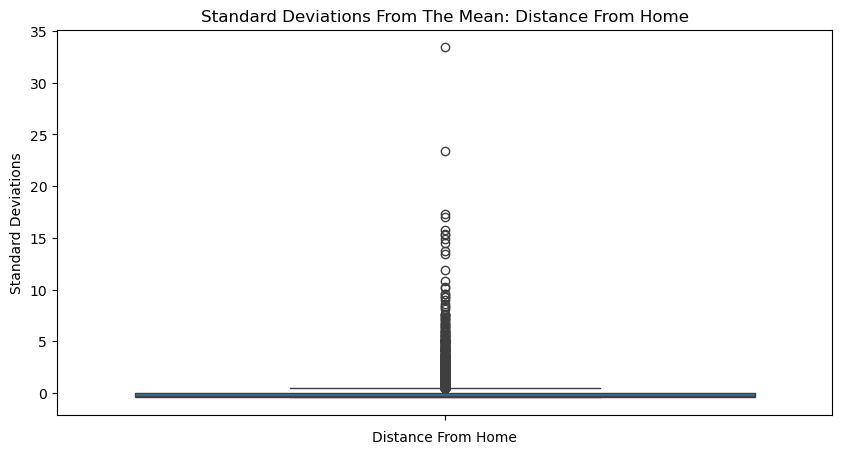

In [28]:
# Visualising the spread of dis_home_zscore to see outliers
plt.figure(figsize=(10,5))
sns.boxplot(reduced_df.dis_home_zscore)
plt.title('Standard Deviations From The Mean: Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Standard Deviations')
plt.show()

# We can see that there are some extreme datapoints on the positive end

In [29]:
# Removing rows that are too many stds away
reduced_df = reduced_df[reduced_df['dis_home_zscore'] <= 3]

# Distance From Last Transaction

In [30]:
# Calculating the mean and std for distance from last transaction
mean_dis_last = reduced_df.distance_from_last_transaction.mean()
std_dis_last = reduced_df.distance_from_last_transaction.std()

# Creating a new column to see how many stds each point is away from the mean
reduced_df['dis_last_zscore'] = (df['distance_from_last_transaction'] - mean_dis_last) / std_dis_last

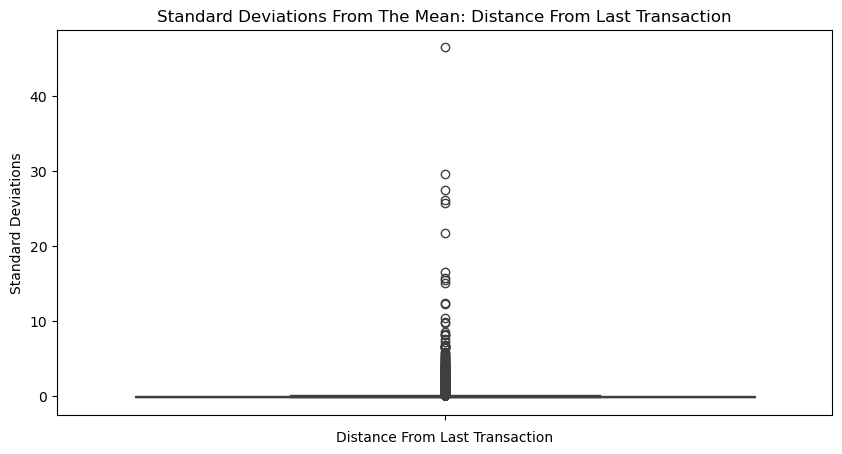

In [31]:
# Visualising the spread of dis_last_zscore to see outliers
plt.figure(figsize=(10,5))
sns.boxplot(reduced_df.dis_last_zscore)
plt.title('Standard Deviations From The Mean: Distance From Last Transaction')
plt.xlabel('Distance From Last Transaction')
plt.ylabel('Standard Deviations')
plt.show()

In [32]:
# Removing the rows of data that are more than 3 zscores away
reduced_df = reduced_df[reduced_df['dis_last_zscore'] <= 3]

# Ratio To Median Purchase Price

In [33]:
# Calculating the mean and std for ratio_to_median_purchase_price
mean_ratio = reduced_df.ratio_to_median_purchase_price.mean()
std_ratio = reduced_df.ratio_to_median_purchase_price.std()

# Creating a new column to see how many stds each point is away from the mean
reduced_df['ratio_zscore'] = (df['ratio_to_median_purchase_price'] - mean_ratio) / std_ratio

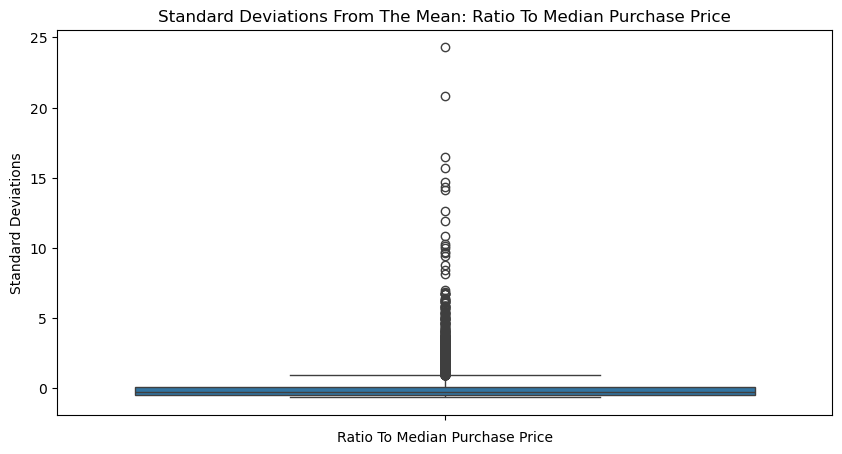

In [34]:
# Visualising the spread of ratio_zscore to see outliers
plt.figure(figsize=(10,5))
sns.boxplot(reduced_df.ratio_zscore)
plt.title('Standard Deviations From The Mean: Ratio To Median Purchase Price')
plt.xlabel('Ratio To Median Purchase Price')
plt.ylabel('Standard Deviations')
plt.show()

In [35]:
# Removing rows of data that more than 3 zscores away
reduced_df = reduced_df[reduced_df['ratio_zscore'] <= 3]

In [36]:
# Checking the counts to see how many fraud/non-fraud rows we removed
reduced_df.fraud.value_counts()

fraud
0.0    8944
1.0     672
Name: count, dtype: int64

In [37]:
# Checking the df shape to see how many total rows were removed
reduced_df.shape

(9616, 11)

In [38]:
# Removing the zscore columns
reduced_df = reduced_df.drop(columns=['dis_home_zscore', 'dis_last_zscore', 'ratio_zscore'])

In [39]:
# Saving the reduced cleaned df 
reduced_df.to_csv('cleaned_fraud.txt')